In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sys
import os
import emoji
from collections import Counter
import pandas as pd
import seaborn as sns
import math
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

## df_robinhoodpennystocks

In [4]:
# read data
data_file_robinhoodpennystocks = ('robinhoodpennystocks/submissions_reddit.csv')
df_robinhoodpennystocks = pd.read_csv(data_file_robinhoodpennystocks)

In [5]:
print(f' shape: {df_robinhoodpennystocks.shape}')
print(df_robinhoodpennystocks.dtypes)

 shape: (23304, 24)
id                        object
author                    object
created                   object
retrieved                 object
edited                    object
pinned                     int64
archived                   int64
locked                     int64
removed                    int64
deleted                    int64
is_self                    int64
is_video                   int64
is_original_content        int64
title                     object
link_flair_text           object
upvote_ratio             float64
score                      int64
gilded                     int64
total_awards_received      int64
num_comments               int64
num_crossposts             int64
selftext                  object
thumbnail                 object
shortlink                 object
dtype: object


In [6]:
df_robinhoodpennystocks

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko1ham,PenniesADay124,2021-01-01 00:27:36,2021-02-28 17:00:49,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,0,0,NaN,default,https://redd.it/ko1ham
1,ko1jwb,[deleted],2021-01-01 00:31:58,2021-02-28 17:00:49,1970-01-01 00:00:00,0,0,0,1,1,...,Gain/Loss,0.33,0,0,0,7,0,[deleted],default,https://redd.it/ko1jwb
2,ko1m60,who-u,2021-01-01 00:36:00,2021-02-28 17:00:49,1970-01-01 00:00:00,0,0,0,0,0,...,Positions,0.89,20,0,0,6,0,NaN,https://b.thumbs.redditmedia.com/dc-6_rLitWVhR...,https://redd.it/ko1m60
3,ko1x0o,JustVibing5420,2021-01-01 00:54:57,2021-02-28 17:00:49,1970-01-01 00:00:00,0,0,0,1,0,...,Gain/Loss,1.00,1,0,0,0,0,NaN,default,https://redd.it/ko1x0o
4,ko226o,momimscaredd,2021-01-01 01:03:50,2021-02-28 17:00:49,1970-01-01 00:00:00,0,0,0,1,0,...,Gain/Loss,1.00,1,0,0,0,0,NaN,default,https://redd.it/ko226o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23299,rstgmv,GENIUSBRANDSINSIDER,2021-12-31 13:02:42,2021-12-31 22:24:35,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,0,0,NaN,default,https://redd.it/rstgmv
23300,rstjaz,Reasonable-Motor7877,2021-12-31 13:06:57,2021-12-31 22:24:35,1970-01-01 00:00:00,0,0,0,1,0,...,Discussion,1.00,1,0,0,0,0,NaN,default,https://redd.it/rstjaz
23301,rsxgrj,Onegod09,2021-12-31 16:25:22,2022-01-01 07:05:25,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,0,0,NaN,default,https://redd.it/rsxgrj
23302,rsxveg,EthiopianCoffee,2021-12-31 16:44:12,2022-01-01 07:05:25,1970-01-01 00:00:00,0,0,0,0,0,...,DD/Research,0.80,42,0,0,11,0,Here's something most folks don't know:\n\n&#x...,self,https://redd.it/rsxveg


In [7]:
df_robinhoodpennystocks.isna().sum()

id                           0
author                       0
created                      0
retrieved                    0
edited                       0
pinned                       0
archived                     0
locked                       0
removed                      0
deleted                      0
is_self                      0
is_video                     0
is_original_content          0
title                        0
link_flair_text          10911
upvote_ratio                 0
score                        0
gilded                       0
total_awards_received        0
num_comments                 0
num_crossposts               0
selftext                  8381
thumbnail                    0
shortlink                    0
dtype: int64

In [8]:
df_robinhoodpennystocks = df_robinhoodpennystocks.dropna(subset='selftext')

In [9]:
print(df_robinhoodpennystocks.shape)

(14923, 24)


In [10]:
unique_selftext_list = df_robinhoodpennystocks['selftext'].unique()
print(unique_selftext_list)

['[deleted]' '[removed]'
 'I know everyone wants to brag about how they’re doing on this sub, but I am scrolling through the plethora of shit gains posts and looking for the next real big move. \n\nI’m asking to post your gains on your profile, and post the rocket ships in the sub. This way I can make some money instead of looking at peoples YTD. \n\nProbably get downvotes, but I’d rather see some DD and the next good move. \nThanks!'
 ...
 'Been getting burned on buying calls lately because thats the “safer” option but realistically would I be better off (for example) selling a $25 call weekly for BBBY, stock price around $15, the premium is $3 per contract, theres no way it rips 10 bucks by this week, is this easy money? \nHave I been missing this all along or is it too good to be true? I know if BBBY does hit by expiration im fucked but I dont see it happening.'
 'What do you do with those where you hold the bag? Should I cut losses and move on? I understand some of these small caps

In [11]:
# Filter out the rows where 'selftext' is 'deleted' or 'removed'
df_robinhoodpennystocks = df_robinhoodpennystocks[~df_robinhoodpennystocks['selftext'].isin(['[deleted]', '[removed]'])]

# Reset the index if needed
df_robinhoodpennystocks.reset_index(drop=True, inplace=True)

print(df_robinhoodpennystocks)

          id           author              created            retrieved  \
0     ko4hgr          Forumkk  2021-01-01 03:52:42  2021-02-28 17:00:49   
1     ko8g97    nomansland999  2021-01-01 09:15:26  2021-02-28 17:00:49   
2     ko8s4w          Samfils  2021-01-01 09:49:03  2021-02-28 17:00:49   
3     koc4ld         Ashony13  2021-01-01 14:29:22  2021-02-28 17:00:49   
4     kocg9t       Paulsitive  2021-01-01 14:51:58  2021-02-28 17:00:49   
...      ...              ...                  ...                  ...   
3906  rr3ro1    AutoModerator  2021-12-29 09:00:14  2021-12-30 09:50:45   
3907  rrx82r    AutoModerator  2021-12-30 09:00:10  2021-12-31 09:27:53   
3908  rsprgu    AutoModerator  2021-12-31 09:00:11  2021-12-31 17:24:35   
3909  rsxveg  EthiopianCoffee  2021-12-31 16:44:12  2022-01-01 07:05:25   
3910  rt4cvj    AutoModerator  2021-12-31 22:00:14  2022-01-01 07:05:25   

                   edited  pinned  archived  locked  removed  deleted  ...  \
0     1970-01-01 00:0

In [12]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data
# nltk.download('vader_lexicon')
# nltk.download('punkt')

In [13]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [14]:
df_robinhoodpennystocks.loc[:, 'TextBlob_Sentiment'] = df_robinhoodpennystocks['selftext'].apply(get_textblob_sentiment)
df_robinhoodpennystocks.loc[:, 'VADER_Sentiment'] = df_robinhoodpennystocks['selftext'].apply(get_vader_sentiment)

In [15]:
# pd.robinhoodpennystocks.mode.copy_on_write = False

In [16]:
print(df_robinhoodpennystocks[['selftext', 'TextBlob_Sentiment', 'VADER_Sentiment']].head())

                                            selftext  TextBlob_Sentiment  \
0  I know everyone wants to brag about how they’r...            0.135714   
1  Now before i get into this, this might not be ...            0.183391   
2  I’ve been having some trouble logging into Rob...           -0.175000   
3  I think it has real potential in the veterinar...            0.000000   
4  Hi, I'm an idiot who doesn't really know what ...            0.120000   

   VADER_Sentiment  
0           0.8516  
1           0.9880  
2           0.3914  
3           0.5095  
4           0.5859  


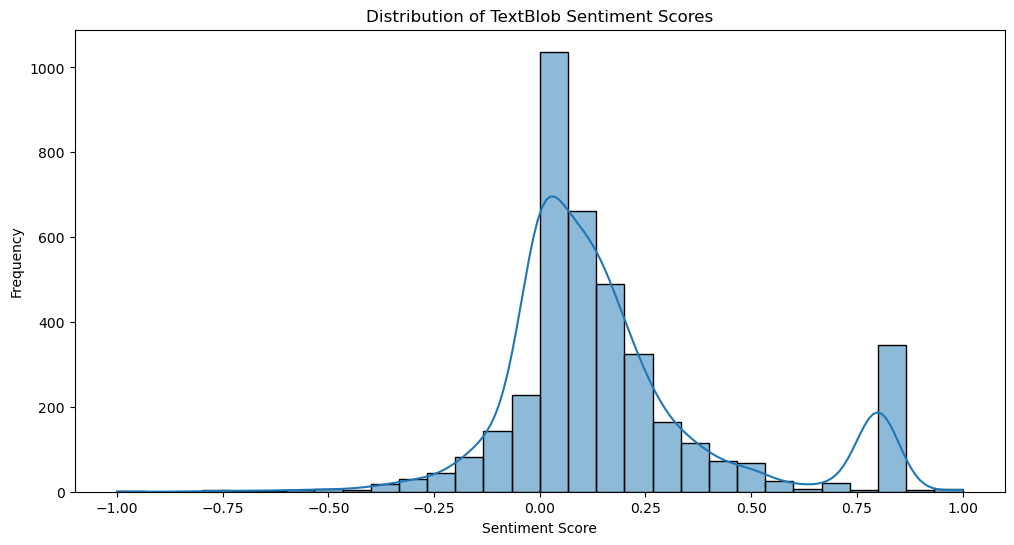

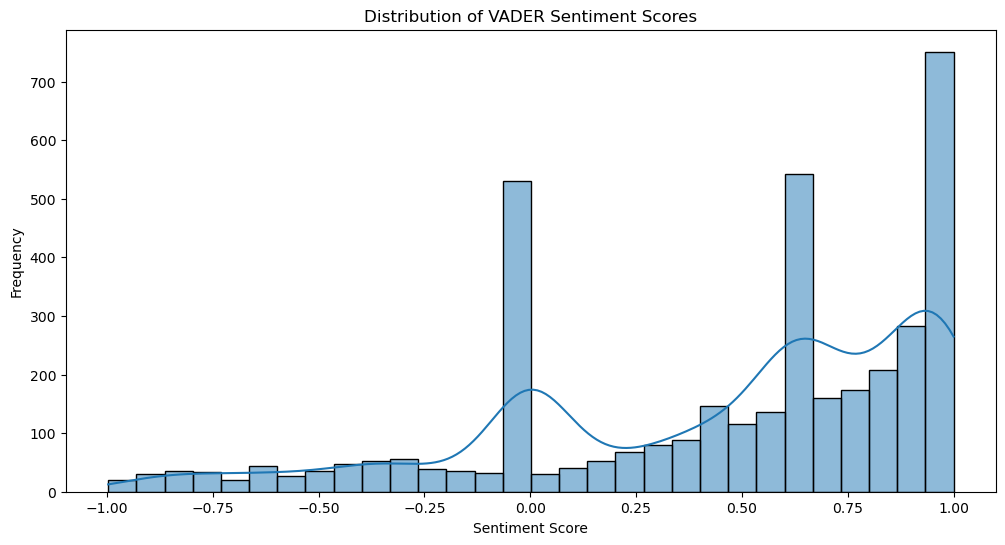

In [17]:
# Plotting the distribution of TextBlob Sentiment
plt.figure(figsize=(12, 6))
sns.histplot(df_robinhoodpennystocks['TextBlob_Sentiment'], bins=30, kde=True)
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of VADER Sentiment
plt.figure(figsize=(12, 6))
sns.histplot(df_robinhoodpennystocks['VADER_Sentiment'], bins=30, kde=True)
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# If you have a 'Date' column, plot sentiment trends over time
if 'Date' in df_robinhoodpennystocks.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if not already

    # Plot TextBlob Sentiment over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_robinhoodpennystocks, x='Date', y='TextBlob_Sentiment')
    plt.title('TextBlob Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()

    # Plot VADER Sentiment over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_robinhoodpennystocks, x='Date', y='VADER_Sentiment')
    plt.title('VADER Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()

interpret the VADER sentiment scores you provided:

0.0000: Neutral sentiment. This score indicates that the text has no strong sentiment, either positive or negative.
0.0000: Again, a neutral sentiment. This could mean that the text is purely factual or balanced in tone.
0.7640: Positive sentiment. This score is quite high, suggesting that the text is strongly positive.
0.6705: Positive sentiment. This score is also indicative of a positive tone, though slightly less strong than 0.7640.
0.4404: Moderately positive sentiment. This score suggests that the text is positive but not overwhelmingly so.

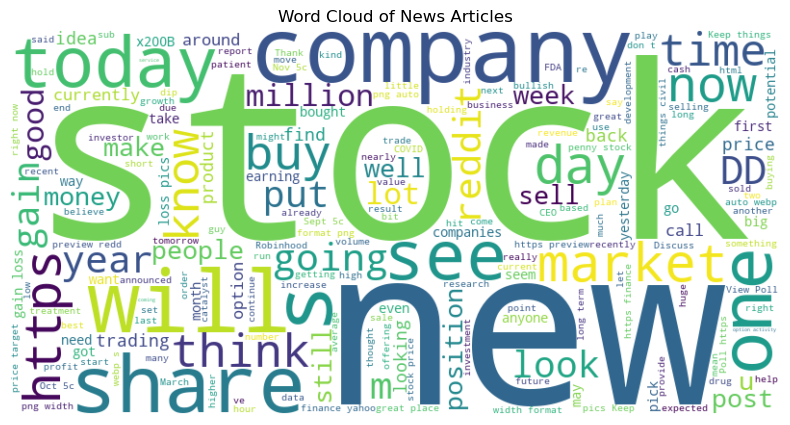

In [18]:
from wordcloud import WordCloud, STOPWORDS

# Combine all the articles into a single string
text = " ".join(selftext for selftext in df_robinhoodpennystocks['selftext'])

# Define stopwords
stopwords = set(STOPWORDS)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of News Articles")
plt.show()

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melodymassis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melodymassis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

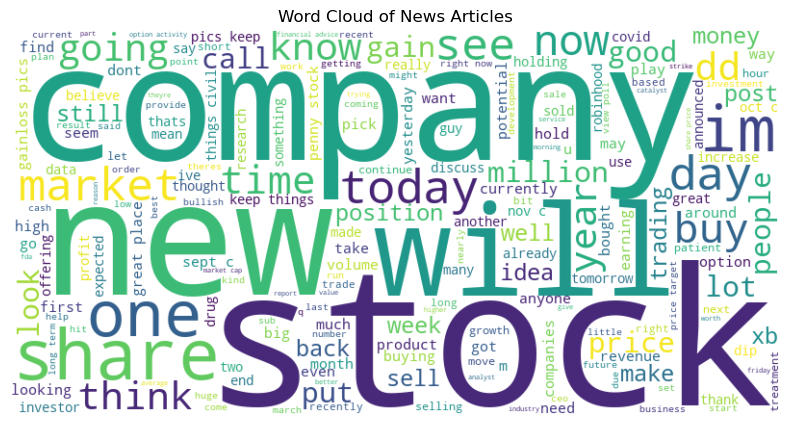

In [21]:
# Define a function to clean the text from unnecessary words
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the selftext column using .loc
df_robinhoodpennystocks.loc[:, 'cleaned_selftext'] = df_robinhoodpennystocks['selftext'].apply(lambda x: clean_text(str(x)))

# Optionally, drop rows with missing cleaned_selftext
df_robinhoodpennystocks = df_robinhoodpennystocks[df_robinhoodpennystocks['cleaned_selftext'].notnull()]

# Combine all the cleaned articles into a single string for the word cloud
cleaned_text = " ".join(selftext for selftext in df_robinhoodpennystocks['cleaned_selftext'])

# Define stopwords for word cloud
stopwords = set(STOPWORDS)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of News Articles")
plt.show()

## Standardizing Numeric Fields

In [22]:
#Examine Numeric Fields
numeric_columns = df_robinhoodpennystocks.dtypes[(df_robinhoodpennystocks.dtypes == 'int64') | (df_robinhoodpennystocks.dtypes == 'float64')].index.values
df_robinhoodpennystocks[numeric_columns]

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,TextBlob_Sentiment,VADER_Sentiment
0,0,0,0,0,0,1,0,0,0.96,108,0,0,45,0,0.135714,0.8516
1,0,0,0,0,0,1,0,0,0.93,30,0,0,20,0,0.183391,0.9880
2,0,0,0,0,0,1,0,0,1.00,3,0,0,1,0,-0.175000,0.3914
3,0,0,0,0,0,1,0,0,0.89,55,0,0,85,0,0.000000,0.5095
4,0,0,0,0,0,1,0,0,1.00,8,0,0,11,0,0.120000,0.5859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0,0,0,0,0,1,0,0,0.50,0,0,0,3,0,0.800000,0.6249
3907,0,0,0,0,0,1,0,0,0.79,11,0,0,3,0,0.800000,0.6249
3908,0,0,0,0,0,1,0,0,0.67,4,0,0,0,0,0.800000,0.6249
3909,0,0,0,0,0,1,0,0,0.80,42,0,0,11,0,0.159118,0.8378


In [23]:
scaling_fields=['upvote_ratio','score','gilded','total_awards_received','num_comments','num_crossposts']
non_scaling_fields = [i for i in df_robinhoodpennystocks.columns if i not in scaling_fields]

In [24]:
scaler = StandardScaler()

df_scaled_values = scaler.fit_transform(df_robinhoodpennystocks[scaling_fields].values)

df_scaled = pd.DataFrame(df_scaled_values, columns=scaling_fields)

In [25]:
df_std = pd.concat((df_robinhoodpennystocks[non_scaling_fields].reset_index(drop=True), df_scaled), axis=1)

## Split Data into training, validation, and test segments.

In [26]:
df_std_y = df_std['score']
df_std = df_std.drop(columns='score')

In [27]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_std, df_std_y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, train_size=0.75)

In [28]:
X_train.shape[0] / df_std.shape[0]

0.5998465865507543

In [29]:
df_robinhoodpennystocks.describe()

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,TextBlob_Sentiment,VADER_Sentiment
count,3911.0,3911.0,3911.0,3911.000000,3911.0,3911.0,3911.0,3911.0,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,0.0,0.0,0.0,0.042956,0.0,1.0,0.0,0.0,0.847305,31.245973,0.010483,0.375352,24.885196,0.048325,0.162994,0.456809
std,0.0,0.0,0.0,0.202783,0.0,0.0,0.0,0.0,0.166384,167.571887,0.120283,2.023960,77.218108,0.333878,0.260744,0.494370
min,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.996800
25%,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.780000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.900000,9.000000,0.000000,0.000000,10.000000,0.000000,0.100000,0.624900
75%,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.980000,22.000000,0.000000,0.000000,22.000000,0.000000,0.230863,0.884050
max,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,1.000000,6850.000000,3.000000,64.000000,1839.000000,9.000000,1.000000,0.999900
